In [1]:
#import libraries

import math
import collections

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing dataset
 
cars = pd.read_csv('autoscout24-germany-dataset.csv')

<b>First look at the dataset:</b>

In [3]:
#check first and last 10 rows

cars.head(10)

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011
5,147000,Toyota,Auris,Electric/Gasoline,Automatic,Used,6950,99.0,2011
6,91894,Renault,Scenic,Diesel,Manual,Used,6970,131.0,2011
7,127500,Opel,Zafira,Gasoline,Manual,Used,6972,116.0,2011
8,115000,Mazda,3,Gasoline,Automatic,Used,6980,150.0,2011
9,104,Ford,Transit,Diesel,Manual,Used,6990,86.0,2011


In [4]:
cars.tail(10)

,mileage,make,model,fuel,gear,offerType,price,hp,year
46395,10,Citroen,C1,Gasoline,Manual,Pre-registered,12340,72.0,2021
46396,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12490,71.0,2021
46397,550,Fiat,500,Electric/Gasoline,Manual,Demonstration,12805,69.0,2021
46398,837,Fiat,Panda,Electric/Gasoline,Manual,Demonstration,12805,69.0,2021
46399,1500,Skoda,Fabia,Gasoline,Manual,Demonstration,12980,60.0,2021
46400,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46401,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46402,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46403,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46404,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021


In [5]:
# Checking null values

cars.isnull().sum()

mileage        0
make           0
model        143
fuel           0
gear         182
offerType      0
price          0
hp            29
year           0
dtype: int64

There are missing values in columns "model",  "gear" and "hp". It should be fixed.

In [6]:
# Check datatypes

cars.dtypes

mileage        int64
make          object
model         object
fuel          object
gear          object
offerType     object
price          int64
hp           float64
year           int64
dtype: object

In [7]:
# Descriptive statictics

pd.set_option('display.float_format', lambda x: '%.2f' % x)
cars[['mileage', 'price', 'hp']].describe()

,mileage,price,hp
count,46405.00,46405.00,46376.00
mean,71177.86,16572.34,132.99
std,62625.31,19304.70,75.45
min,0.00,1100.00,1.00
25%,19800.00,7490.00,86.00
50%,60000.00,10999.00,116.00
75%,105000.00,19490.00,150.00
max,1111111.00,1199900.00,850.00


In [8]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46405 entries, 0 to 46404
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    46405 non-null  int64  
 1   make       46405 non-null  object 
 2   model      46262 non-null  object 
 3   fuel       46405 non-null  object 
 4   gear       46223 non-null  object 
 5   offerType  46405 non-null  object 
 6   price      46405 non-null  int64  
 7   hp         46376 non-null  float64
 8   year       46405 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.2+ MB


<b>Data cleaning: </b>

In [9]:
#create dataframe with missing values

missing = cars.isnull()
missing.head(10)

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [10]:
# Find average hp and replace missing values

avg_hp = cars['hp'].mean(axis = 0)
avg_hp

132.99098671726756

In [11]:
cars['hp'].replace(np.nan, avg_hp, inplace = True)
cars['hp'].isnull().sum()

0

In [12]:
cars.loc[cars['model'].isna()]

,mileage,make,model,fuel,gear,offerType,price,hp,year
365,3500,Others,NaN,Electric,Manual,Used,5500,38.00,2018
2001,2900,Others,NaN,Electric,Automatic,Used,7900,5.00,2018
2009,60866,Opel,NaN,Gasoline,Manual,Used,12290,82.00,2019
2019,3550,Opel,NaN,Gasoline,Manual,Used,15800,110.00,2019
2496,3000,Audi,NaN,Electric,Automatic,Demonstration,172450,598.00,2021
...,...,...,...,...,...,...,...,...,...
46074,1,Others,NaN,Gasoline,Manual,Pre-registered,23990,150.00,2021
46102,1,Others,NaN,Gasoline,Manual,Pre-registered,23990,150.00,2021
46114,35,Kia,NaN,Electric/Gasoline,Automatic,Pre-registered,30440,141.00,2021
46120,35,Kia,NaN,Electric,Automatic,Pre-registered,32440,204.00,2021


In [13]:

# Drop rows with NaN value in model column

cars.dropna(subset = ["model"], axis = 0, inplace = True)
cars.reset_index(drop = True, inplace = True)

In [14]:
# Finding most frequent gear value replace missing values

cars['gear'].value_counts().idxmax()

'Manual'

In [15]:
cars['gear'].replace(np.nan, "Manual", inplace = True)

In [16]:
# Also check fuel column
cars['fuel'].unique()

array(['Diesel', 'Gasoline', 'Electric/Gasoline', '-/- (Fuel)',
       'Electric', 'Electric/Diesel', 'CNG', 'LPG', 'Others', 'Hydrogen',
       'Ethanol'], dtype=object)

'-/- (Fuel)' value in the 'fuel' column should be replaced.

In [17]:
# Find most frequent value and replace

cars['gear'].value_counts().idxmax()

cars['fuel'].replace('-/- (Fuel)', 'Gasoline', inplace = True)

In [18]:
# We have seen in descriptive statistics that min value of hp is 1. That can't be true, we should replase it.

cars.loc[cars['hp'] == 1]

,mileage,make,model,fuel,gear,offerType,price,hp,year
9091,167000,Renault,Megane,Diesel,Manual,Used,5450,1.00,2012
36106,302000,Toyota,Prius+,Electric/Gasoline,Manual,Used,7985,1.00,2013


In [19]:
cars[['hp']].loc[(cars['model'] == 'Megane') & (cars['year'] == 2012)].mean()

hp   110.61
dtype: float64

In [20]:
cars[['year', 'hp']].loc[(cars['model'] == 'Prius')].mean()

year   2013.69
hp      107.21
dtype: float64

In [21]:
# replace hp 1 values with 110
cars['hp'].replace(1, 110, inplace = True)
cars.loc[(cars['model'] == 'Megane') & (cars['year'] == 2012)]

,mileage,make,model,fuel,gear,offerType,price,hp,year
3805,170000,Renault,Megane,Gasoline,Manual,Used,5000,131.00,2012
4021,112800,Renault,Megane,Gasoline,Manual,Used,4800,101.00,2012
4026,72450,Renault,Megane,Gasoline,Manual,Used,4888,116.00,2012
7187,110000,Renault,Megane,Gasoline,Manual,Used,5499,101.00,2012
9091,167000,Renault,Megane,Diesel,Manual,Used,5450,110.00,2012
9470,101111,Renault,Megane,Gasoline,Manual,Used,5990,110.00,2012
9476,148401,Renault,Megane,Diesel,Manual,Used,5990,106.00,2012
11163,111000,Renault,Megane,Diesel,Manual,Used,5999,106.00,2012
11574,101362,Renault,Megane,Gasoline,Automatic,Used,8750,140.00,2012
12451,124000,Renault,Megane,Diesel,Manual,Used,5750,106.00,2012


In [22]:
cars[['mileage', 'price', 'hp']].describe()

,mileage,price,hp
count,46262.00,46262.00,46262.00
mean,71259.64,16544.75,132.89
std,62635.20,19253.64,75.01
min,0.00,1100.00,5.00
25%,19900.00,7490.00,86.00
50%,60000.00,10999.00,116.00
75%,105000.00,19483.75,150.00
max,1111111.00,1199900.00,850.00


Now we can see that the minimum HP value is 5. Let's investigate it.

In [23]:
cars.loc[cars['hp'] == 850]

,mileage,make,model,fuel,gear,offerType,price,hp,year
43013,9234,Mercedes-Benz,G 63 AMG,Gasoline,Automatic,Used,216619,850.00,2019


That's true, Microcar Doe has 5 horsepower. Let's go further.

In [24]:
cars.isnull().sum()

mileage      0
make         0
model        0
fuel         0
gear         0
offerType    0
price        0
hp           0
year         0
dtype: int64

In [25]:
# set year column datatype as object 

cars[["year"]] = cars[["year"]].astype('object')

<b>Start our analysis with visualizations:</b>

Let's have a look at how horsepower is distributed among all cars:

Text(0.5, 1.0, 'Horsepower bins')

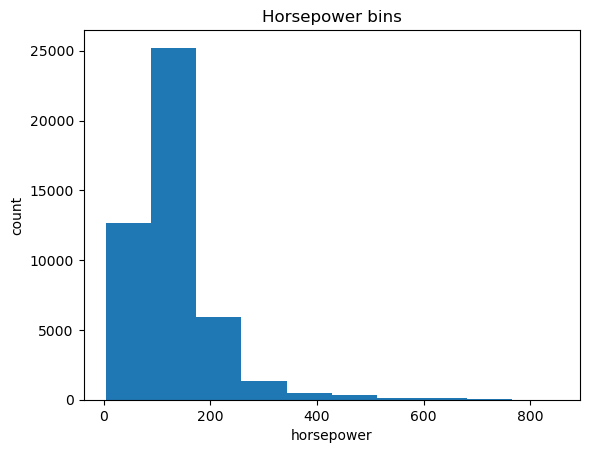

In [26]:
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(cars['hp'])

plt.pyplot.xlabel('horsepower')
plt.pyplot.ylabel('count')
plt.pyplot.title('Horsepower bins')

According to the descriptive statistics, 75% of all cars have less than 150 horsepower. 25% is between 150 and 850. Here we have huge outliers.

We can also represent data about horsepower like this:

In [27]:
# divide cars into 4 groups of horsepower

groups = np.array([1., 100., 200., 400., 850.])
group_names = ['5-100 hp', '100-200 hp', '200-400 hp', '400 + hp']
cars['hp-bin'] = pd.cut(cars['hp'], groups, labels = group_names, include_lowest = True)
cars[['hp', 'hp-bin']].head(10)

,hp,hp-bin
0,116.00,100-200 hp
1,122.00,100-200 hp
2,160.00,100-200 hp
3,110.00,100-200 hp
4,156.00,100-200 hp
5,99.00,5-100 hp
6,131.00,100-200 hp
7,116.00,100-200 hp
8,150.00,100-200 hp
9,86.00,5-100 hp


In [28]:
cars.loc[cars['hp-bin'] == '5-100 hp']

,mileage,make,model,fuel,gear,offerType,price,hp,year,hp-bin
5,147000,Toyota,Auris,Electric/Gasoline,Automatic,Used,6950,99.00,2011,5-100 hp
9,104,Ford,Transit,Diesel,Manual,Used,6990,86.00,2011,5-100 hp
15,72000,Volkswagen,Polo,Gasoline,Manual,Used,6999,60.00,2011,5-100 hp
20,44800,Kia,Picanto,Gasoline,Automatic,Used,7850,86.00,2012,5-100 hp
32,128000,MINI,One D Countryman,Diesel,Manual,Used,7990,90.00,2012,5-100 hp
...,...,...,...,...,...,...,...,...,...,...
46257,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.00,2021,5-100 hp
46258,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.00,2021,5-100 hp
46259,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.00,2021,5-100 hp
46260,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.00,2021,5-100 hp


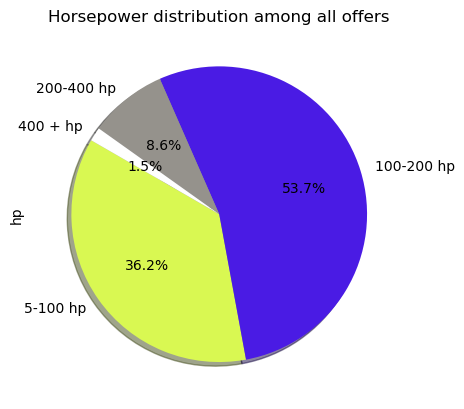

In [29]:
pie1 = cars.groupby(['hp-bin']).count()
plot = pie1.plot.pie(y = 'hp', title="Horsepower distribution among all offers", legend=False,
                   autopct='%1.1f%%', colors = ['#d9f852', '#4a1be4', '#95928c', '#ffffff'],
                   shadow=True, startangle=150)

In [30]:
# Let's make price bins and a pie chart 

groups1 = np.array([1., 10000., 20000., 50000., 2000000.])
group_names1 = ['< 10000€', '10000-20000€', '20000-50000€', '50000€ +',]
cars['price-bin'] = pd.cut(cars['price'], groups1, labels = group_names1, include_lowest = True)
cars[['price', 'price-bin']].head(10)

,price,price-bin
0,6800,< 10000€
1,6877,< 10000€
2,6900,< 10000€
3,6950,< 10000€
4,6950,< 10000€
5,6950,< 10000€
6,6970,< 10000€
7,6972,< 10000€
8,6980,< 10000€
9,6990,< 10000€


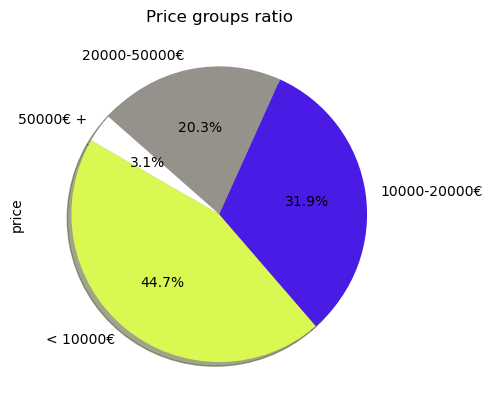

In [31]:
pie_price_bins = cars.groupby(['price-bin']).count()
plot = pie_price_bins.plot.pie(y = 'price', title="Price groups ratio", legend=False,
                   autopct='%1.1f%%', colors = ['#d9f852', '#4a1be4', '#95928c', '#ffffff'],
                   shadow=True, startangle=150)

In [32]:
cars['price-bin'].value_counts()

< 10000€        20664
10000-20000€    14770
20000-50000€     9371
50000€ +         1457
Name: price-bin, dtype: int64

44.7% of all AutoScaut24 offers have prices less than 10,000 euros.

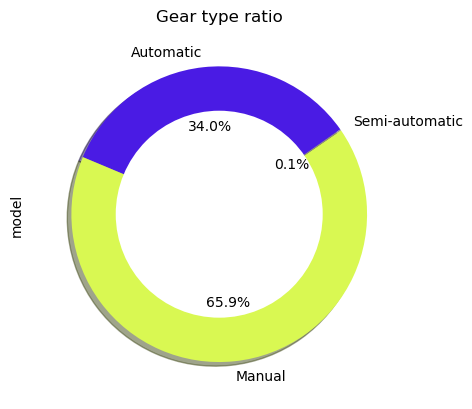

In [33]:
# Check gear type ratio

import matplotlib.pyplot as plt

pie_gear = cars.groupby(['gear']).count()
plot_gear = pie_gear.plot.pie(y = 'model', title="Gear type ratio", legend=False,
                   autopct='%1.1f%%', colors = ['#4a1be4', '#d9f852', '#95928c'],
                   shadow=True, startangle=35)
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Add circle to the pie chart
fig.gca().add_artist(centre_circle)

In [34]:
cars['gear'].value_counts()

Manual            30492
Automatic         15714
Semi-automatic       56
Name: gear, dtype: int64

In [35]:
# Check fuel type value_counts
cars['fuel'].value_counts()

Gasoline             28822
Diesel               15220
Electric/Gasoline     1150
Electric               725
LPG                    126
CNG                    116
Electric/Diesel         53
Others                  47
Ethanol                  2
Hydrogen                 1
Name: fuel, dtype: int64

In [36]:
cars.loc[cars['fuel'] == 'Others']

,mileage,make,model,fuel,gear,offerType,price,hp,year,hp-bin,price-bin
2994,50150,Toyota,Verso-S,Others,Manual,Used,9450,99.00,2015,5-100 hp,< 10000€
3126,49,Fiat,500,Others,Manual,Pre-registered,14190,69.00,2021,5-100 hp,10000-20000€
4504,53750,Hyundai,i10,Others,Manual,Used,6880,69.00,2014,5-100 hp,< 10000€
4505,53750,Hyundai,i10,Others,Manual,Used,6880,69.00,2014,5-100 hp,< 10000€
4849,800,Fiat,500,Others,Manual,Pre-registered,14490,69.00,2021,5-100 hp,10000-20000€
4857,49,Fiat,500,Others,Manual,Pre-registered,14989,69.00,2021,5-100 hp,10000-20000€
5207,43400,Toyota,Aygo,Others,Manual,Used,8584,72.00,2018,5-100 hp,< 10000€
6529,1500,Renault,Clio,Others,Manual,Demonstration,15580,72.00,2021,5-100 hp,10000-20000€
7206,119076,Renault,Clio,Others,Manual,Used,5990,73.00,2013,5-100 hp,< 10000€
8070,87051,Toyota,Yaris,Others,Automatic,Used,10200,101.00,2014,100-200 hp,10000-20000€


Some fuel-related data is useless because it provides insufficient information for analysis and visualization. We can use grouping.

In [37]:
# Rename LPG CNG Ethanol Hydrogen with Gas

cars['fuel_group'] = cars['fuel']
cars['fuel_group'].replace('LPG', 'Gas', inplace = True)
cars['fuel_group'].replace('CNG', 'Gas', inplace = True)
cars['fuel_group'].replace('Ethanol', 'Gas', inplace = True)
cars['fuel_group'].replace('Hydrogen', 'Gas', inplace = True)

Checking information about models of cars that have "Other" fuel types, we can find out that almost all of them may possibly have gasoline fuel types.

In [38]:
# Replace 'Others' value with 'Gasoline' 

cars['fuel_group'].replace('Others', 'Gasoline', inplace = True)

In [39]:
# Group 'Electric/Gasoline' and 'Electric/Diesel' into 'Hybrid'

cars['fuel_group'].replace('Electric/Gasoline', 'Hybrid', inplace = True)
cars['fuel_group'].replace('Electric/Diesel', 'Hybrid', inplace = True)

In [40]:
cars['fuel_group'].value_counts()

Gasoline    28869
Diesel      15220
Hybrid       1203
Electric      725
Gas           245
Name: fuel_group, dtype: int64

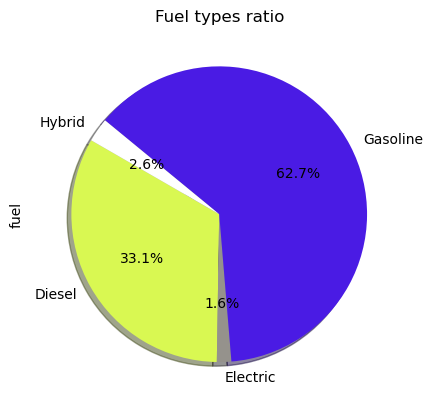

In [41]:
# Create fuel type pie chart

plt.rcParams['font.size'] = 10
pf = cars.loc[cars['fuel_group'] != 'Gas']
pie_fuel = pf.groupby(['fuel_group']).count()
plot = pie_fuel.plot.pie(y = 'fuel', title="Fuel types ratio", legend=False,
                   autopct='%1.1f%%', colors = ['#d9f852', '#95928c', '#4a1be4' , '#ffffff'],
                   shadow=True, startangle=150)

Let's investigate offer type column:

In [42]:
cars['offerType'].value_counts()

Used              39997
Pre-registered     2773
Demonstration      2360
Employee's car     1119
New                  13
Name: offerType, dtype: int64

No surprises; almost all offer types are 'Used'. We can also group values in a column to check the ratio between New and Used cars.

In [43]:
# add 'Pre-registered' 'Demonstration' into 'New'

cars['new/used'] = cars['offerType']
cars['new/used'].replace('Pre-registered', 'New', inplace = True)
cars['new/used'].replace('Demonstration', 'New', inplace = True)

# add 'Employee's car' into 'Used'
cars['new/used'].replace("Employee's car", 'Used', inplace = True)

In [44]:
cars['new/used'].value_counts()

Used    41116
New      5146
Name: new/used, dtype: int64

Text(0.5, 1.0, 'Novelty bars')

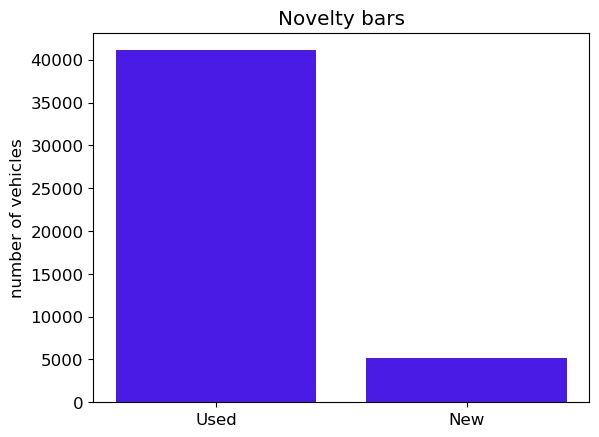

In [45]:

# Create pie chart with ratio of New and Used car offers

plt.rcParams['font.size'] = 12

pyplot.bar(cars['new/used'].unique(), cars['new/used'].value_counts(), color = '#4a1be4')

pyplot.ylabel('number of vehicles')
pyplot.title('Novelty bars')


<b>Statistical analysis:</b>

Now we are going to check some relationships between numeric variables.

In [46]:
cars.corr()

,mileage,price,hp
mileage,1.00,-0.30,-0.01
price,-0.30,1.00,0.75
hp,-0.01,0.75,1.00


In [47]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(cars['price'], cars['mileage'])
print('The Pearson correlation is', pearson_coef, 'p-value is', p_value)

The Pearson correlation is -0.3029055607343057 p-value is 0.0


In [48]:
pearson_coef1, p_value1 = stats.pearsonr(cars['year'], cars['mileage'])
print('The Pearson correlation is', pearson_coef1, 'p-value is', p_value1)

The Pearson correlation is -0.6761068197701512 p-value is 0.0


In [49]:
pearson_coef2, p_value2 = stats.pearsonr(cars['price'], cars['year'])
print('The Pearson correlation is', pearson_coef2, 'p-value is', p_value2)

The Pearson correlation is 0.405955832374066 p-value is 0.0


In [50]:
gear_test = cars[['gear', 'model', 'price']]
pricegear_test = gear_test[['gear', 'price']].groupby(['gear'])

pricegear_test.head(2)

,gear,price
0,Manual,6800
1,Manual,6877
5,Automatic,6950
8,Automatic,6980
901,Semi-automatic,9780
902,Semi-automatic,9780


In [51]:
gear_test

,gear,model,price
0,Manual,316,6800
1,Manual,Golf,6877
2,Manual,Exeo,6900
3,Manual,Megane,6950
4,Manual,308,6950
...,...,...,...
46257,Manual,500,12990
46258,Manual,500,12990
46259,Manual,500,12990
46260,Manual,500,12990


In [52]:
pricegear_test.get_group('Manual')['price']

0         6800
1         6877
2         6900
3         6950
4         6950
         ...  
46257    12990
46258    12990
46259    12990
46260    12990
46261    12990
Name: price, Length: 30492, dtype: int64

Very high f -value, p-value < 0.001. Correlation between gear type and price is statistically significant.  

In [53]:
f_val, p_val = stats.f_oneway(pricegear_test.get_group('Manual')['price'], pricegear_test.get_group('Automatic')['price'])

print('Anova results: f = ', f_val, ', p = ', p_val)

Anova results: f =  10635.900231397447 , p =  0.0


Strong correlation too.

In [54]:
f_val, p_val = stats.f_oneway(pricegear_test.get_group('Manual')['price'], pricegear_test.get_group('Semi-automatic')['price'])

print('Anova results: f = ', f_val, ', p = ', p_val)

Anova results: f =  5.703817139510052 , p =  0.016934095527232778


F-value is not high, p > 0.001. No strong correlation.

In [55]:
f_val, p_val = stats.f_oneway(pricegear_test.get_group('Automatic')['price'], pricegear_test.get_group('Semi-automatic')['price'])

print('Anova results: f = ', f_val, ', p = ', p_val)

Anova results: f =  27.278758841863247 , p =  1.7837561625754947e-07


Here we can see correlation to. We can note that 'Manual' and 'Semi-autmatic' gear types are not strongly correlated with one another.

(0.0, 1260347.8472629217)

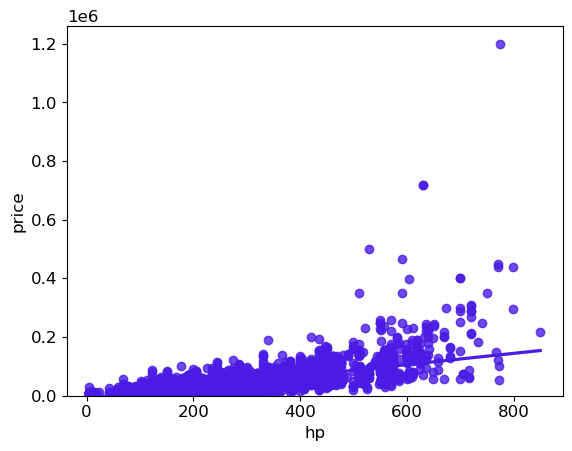

In [69]:
# Create a scatterplot that show price by hp distribution

sns.regplot(x='hp', y = 'price', data = cars, color = '#4a1be4')
plt.ylim(0,)

(0.0, 400000.0)

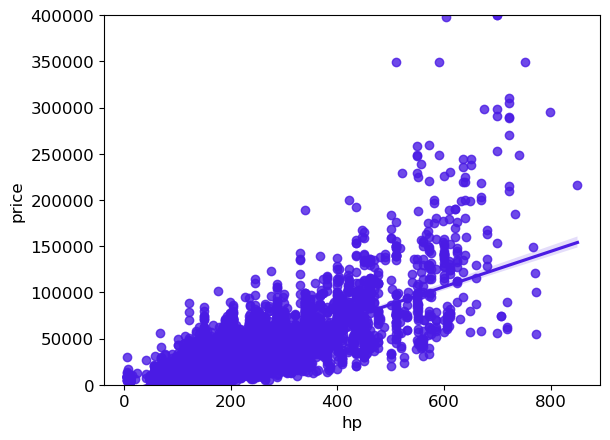

In [70]:
sns.regplot(x='hp', y = 'price', data = cars, color = '#4a1be4')
plt.ylim(0,400000)

There is a correlation coefficient of 0.75 between horsepower and price. Also, there is a high probability of price outliers when the horsepower value is higher than 450.

Now we are going to check how fuel types are represented in cars produced in different years.

<b>Let's continue our visualizations and analysis:</b>

(350.0, 3221.0)

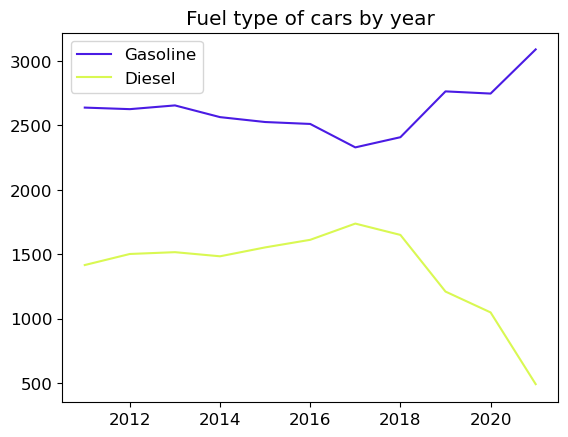

In [69]:
# Create fuel type by year line charts

fuel_count = cars.groupby(['year', 'fuel_group'], as_index = False).count()
fuel_count
gasoline = fuel_count[(fuel_count['fuel_group'] == 'Gasoline')]
diesel = fuel_count[(fuel_count['fuel_group'] == 'Diesel')]
hybrid = fuel_count[(fuel_count['fuel_group'] == 'Hybrid')]
gas = fuel_count[(fuel_count['fuel_group'] == 'Gas')]
electric = fuel_count[(fuel_count['fuel_group'] == 'Electric')]

plt.plot(gasoline['year'], gasoline['make'], label = 'Gasoline', color = '#4a1be4')
plt.plot(diesel['year'], diesel['make'], label = 'Diesel', color = '#d9f852')
plt.legend()
plt.title('Fuel type of cars by year') 
plt.ylim(350,)

(0.0, 435.55)

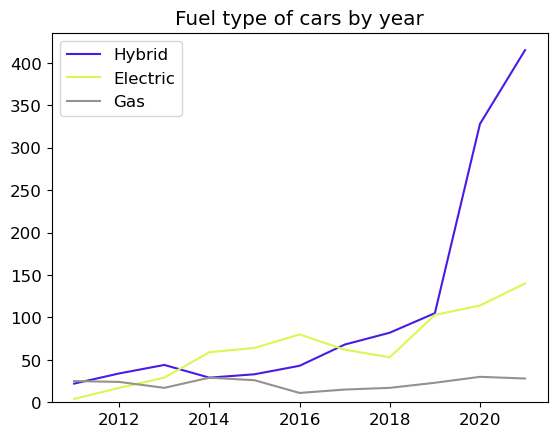

In [70]:
plt.plot(hybrid['year'], hybrid['make'], label = 'Hybrid', color = '#4a1be4')
plt.plot(electric['year'], electric['make'], label = 'Electric', color = '#d9f852')
plt.plot(gas['year'], gas['make'], label = 'Gas', color = '#95928c')
plt.legend()
plt.title('Fuel type of cars by year') 
plt.ylim(0,)

Quantity of diesel cars that people sell on AutoScaut2024 has the highest value in 2017. At the same time, gasoline car quantity is at its lowest. The line representing the number of gasoline cars has a downtrend until 2017 and an uptrend from 2017 to 2021. The line representing the number of diesel cars has an uptrend until 2017 and a strong decrease between 2017 and 2021:  diesel cars produced in 2021, will be 4 times less than those produced in 2017. The number of electric and hybrid vehicles represented increases with the year of manufacture. Gas cars are scarce, the trend is flat, and their quantity does not tend to increase or decrease significantly over production years.   

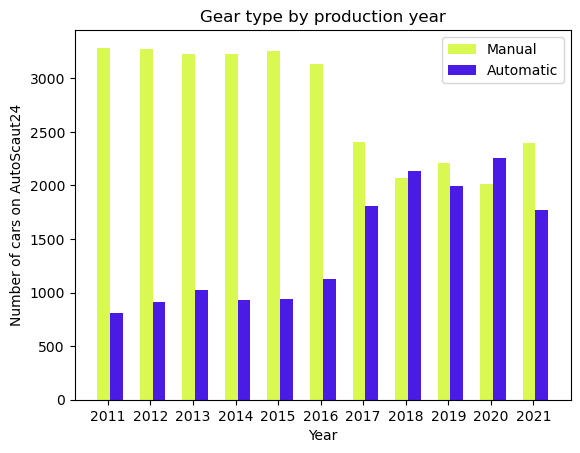

In [71]:
plt.rcParams['font.size'] = 10
gear_count = cars.groupby(['year', 'gear'], as_index = False).count()
X = gear_count['year'].unique()
manual = gear_count[(gear_count['gear'] == 'Manual')]
automatic = gear_count[(gear_count['gear'] == 'Automatic')]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.1, manual['make'], 0.3, label = 'Manual', color = '#d9f852')
plt.bar(X_axis + 0.2, automatic['make'], 0.3, label = 'Automatic', color = '#4a1be4')
  
plt.xticks(X_axis, X)
plt.xlabel("Year")
plt.ylabel("Number of cars on AutoScaut24")
plt.title("Gear type by production year")
plt.legend()
plt.show()

Offers with a production year prior to 2017 have significantly more manual gear types, whereas offers with a production year after 2017 have nearly equal gear types. Automatic gear types were more represented in 2018 and 2020. On this chart, we don't add semi-automatic cars because they are too underrepresented.

(0.0, 456.75)

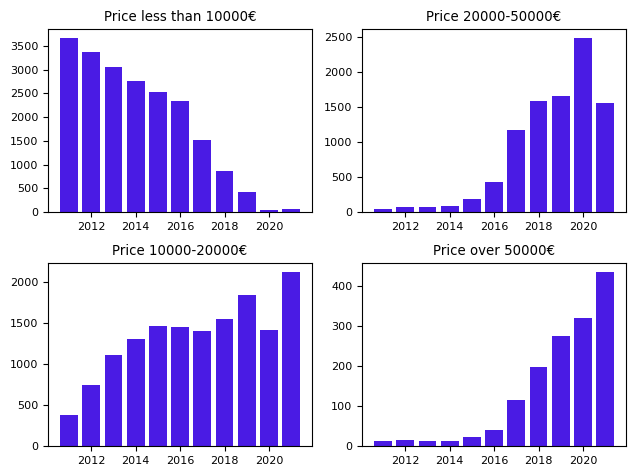

In [72]:
# Create bars that show how price groups are represented by production year

plt.rcParams['font.size'] = 8

import matplotlib.pyplot as plt
import numpy as np

price_bin_year = cars.groupby(['price-bin', 'year'], as_index = False).count()
bin1 = price_bin_year[(price_bin_year['price-bin'] == '< 10000€')]
bin2 = price_bin_year[(price_bin_year['price-bin'] == '10000-20000€')]
bin3 = price_bin_year[(price_bin_year['price-bin'] == '20000-50000€')]
bin4 = price_bin_year[(price_bin_year['price-bin'] == '50000€ +')]

fig, axs = plt.subplots(2, 2)
axs[0, 0].bar(bin1['year'], bin1['make'], label = '< 10000€', color = '#4a1be4')
axs[0, 0].set_title('Price less than 10000€')
axs[1, 0].bar(bin2['year'], bin2['make'], label = '10000-20000€', color = '#4a1be4')
axs[1, 0].set_title('Price 10000-20000€')
axs[1, 0].sharex(axs[0, 0])
axs[0, 1].bar(bin3['year'], bin3['make'], label = '20000-50000€', color = '#4a1be4')
axs[0, 1].set_title('Price 20000-50000€')
axs[1, 1].bar(bin4['year'], bin4['make'], label = '50000€ +', color = '#4a1be4')
axs[1, 1].set_title('Price over 50000€')
fig.tight_layout()
plt.ylim(0,)

Cars with prices lower than 10,000 euros tend to be less represented when production year increases. And reverce when the price exceeds 10000€. 

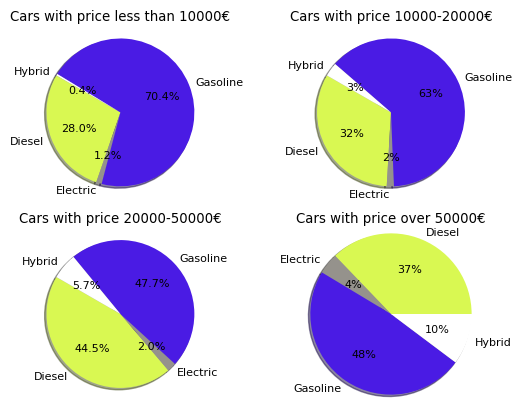

In [73]:
plt.rcParams['font.size'] = 8

fuel_ng = cars.loc[cars['fuel_group'] != 'Gas']
price_bin_fuel = fuel_ng.groupby(['price-bin', 'fuel_group'], as_index = False).count()
bin12 = price_bin_fuel[(price_bin_fuel['price-bin'] == '< 10000€')]
bin22 = price_bin_fuel[(price_bin_fuel['price-bin'] == '10000-20000€')]
bin32 = price_bin_fuel[(price_bin_fuel['price-bin'] == '20000-50000€')]
bin42 = price_bin_fuel[(price_bin_fuel['price-bin'] == '50000€ +')]

fig1, axs1 = plt.subplots(2, 2)
axs1[0, 0].pie(bin12['make'], labels = bin12['fuel_group'], autopct='%1.1f%%', colors = ['#d9f852', '#95928c', '#4a1be4' , '#ffffff'], shadow=True, startangle=150, radius=1.1)
axs1[0, 0].set_title('Cars with price less than 10000€')
axs1[0, 1].pie(bin22['make'], labels=bin22['fuel_group'], autopct='%.0f%%', colors = ['#d9f852', '#95928c', '#4a1be4' , '#ffffff'],shadow=True, startangle=150, radius=1.1)
axs1[0, 1].set_title('Cars with price 10000-20000€')
axs1[1, 0].pie(bin32['make'], labels=bin32['fuel_group'], autopct='%1.1f%%', colors = ['#d9f852', '#95928c', '#4a1be4' , '#ffffff'],shadow=True, startangle=150, radius=1.1)
axs1[1, 0].set_title('Cars with price 20000-50000€')
axs1[1, 1].pie(bin42['make'], labels=bin42['fuel_group'], autopct='%.0f%%', colors = ['#d9f852', '#95928c', '#4a1be4' , '#ffffff'], shadow=True,  radius=1.2)
axs1[1, 1].set_title('Cars with price over 50000€')
plt.show()

Gasoline cars are widely represented (70,4%) among cars with prices lower than 10000 euro. This ratio falls (7.4%) in the next group and falls below half in the next two groups. Another fuel types tends to be more represented in the groups with higher prices. The diesel rate has decreased slightly in the 4th price group.

(0.0, 15147.55)

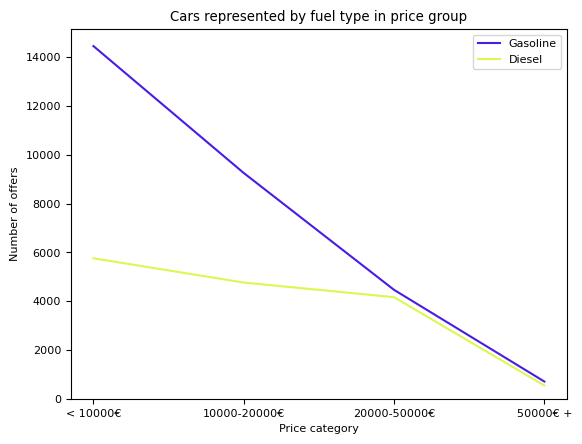

In [74]:
fuel_count1 = cars.groupby(['price-bin', 'fuel_group'], as_index = False).count()
fuel_count
gasoline = fuel_count1[(fuel_count1['fuel_group'] == 'Gasoline')]
diesel = fuel_count1[(fuel_count1['fuel_group'] == 'Diesel')]
hybrid = fuel_count1[(fuel_count1['fuel_group'] == 'Hybrid')]
gas = fuel_count1[(fuel_count1['fuel_group'] == 'Gas')]
electric = fuel_count1[(fuel_count1['fuel_group'] == 'Electric')]

plt.plot(gasoline['price-bin'], gasoline['make'], label = 'Gasoline', color = '#4a1be4')
plt.plot(diesel['price-bin'], diesel['make'], label = 'Diesel', color = '#d9f852')
plt.legend()
plt.title('Cars represented by fuel type in price group') 
plt.ylabel('Number of offers')
plt.xlabel('Price category')
plt.ylim(0,)

(0.0, 560.6)

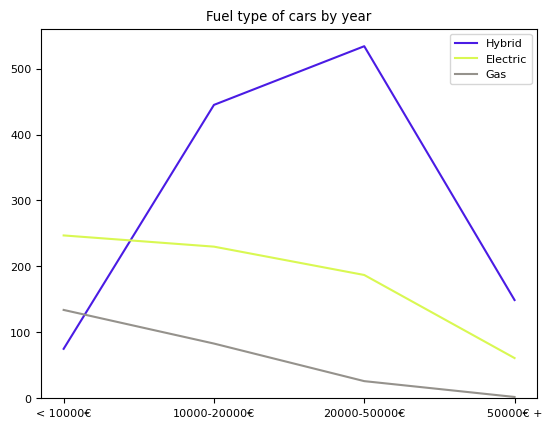

In [75]:
plt.plot(hybrid['price-bin'], hybrid['make'], label = 'Hybrid', color = '#4a1be4')
plt.plot(electric['price-bin'], electric['make'], label = 'Electric', color = '#d9f852')
plt.plot(gas['price-bin'], gas['make'], label = 'Gas', color = '#95928c')
plt.legend()
plt.title('Fuel type of cars by year') 
plt.ylim(0,)

But looking to the entire population, almost all fuel types, except Hybrid tends to be less reprecented, while price increases.

(0.0, 1479.45)

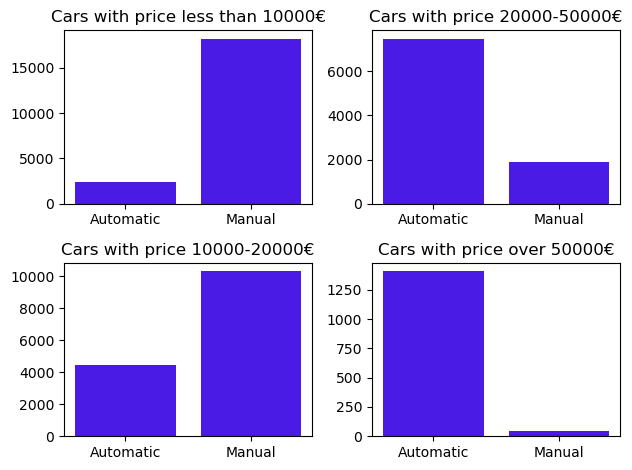

In [123]:
# Create bar charts, that show how gear type 'Manual' and 'Automatic' represented in price groups 

plt.rcParams['font.size'] = 10

import matplotlib.pyplot as plt
import numpy as np

cars_ma = cars.loc[cars['gear'] != 'Semi-automatic']
price_bin_year1 = cars_ma.groupby(['price-bin', 'gear'], as_index = False).count()
bin11 = price_bin_year1[(price_bin_year1['price-bin'] == '< 10000€')]
bin21 = price_bin_year1[(price_bin_year1['price-bin'] == '10000-20000€')]
bin31 = price_bin_year1[(price_bin_year1['price-bin'] == '20000-50000€')]
bin41 = price_bin_year1[(price_bin_year1['price-bin'] == '50000€ +')]

fig, axs = plt.subplots(2, 2)
axs[0, 0].bar(bin11['gear'], bin11['make'], label = '< 10000€', color = '#4a1be4')
axs[0, 0].set_title('Cars with price less than 10000€')
axs[1, 0].bar(bin21['gear'], bin21['make'], label = '10000-20000€', color = '#4a1be4')
axs[1, 0].set_title('Cars with price 10000-20000€')
axs[1, 0].sharex(axs[0, 0])
axs[0, 1].bar(bin31['gear'], bin31['make'], label = '20000-50000€', color = '#4a1be4')
axs[0, 1].set_title('Cars with price 20000-50000€')
axs[1, 1].bar(bin41['gear'], bin41['make'], label = '50000€ +', color = '#4a1be4')
axs[1, 1].set_title('Cars with price over 50000€')
fig.tight_layout()
plt.ylim(0,)

Here we can note, that in cars with prices lower than 20,000 euros, manual gear types are more often found. And vice versa if the price is equal to or greater than 20000 euros. The higher the price, the less likely the car has manual gears and reverse for automatic transmission. 

(0.0, 50.4)

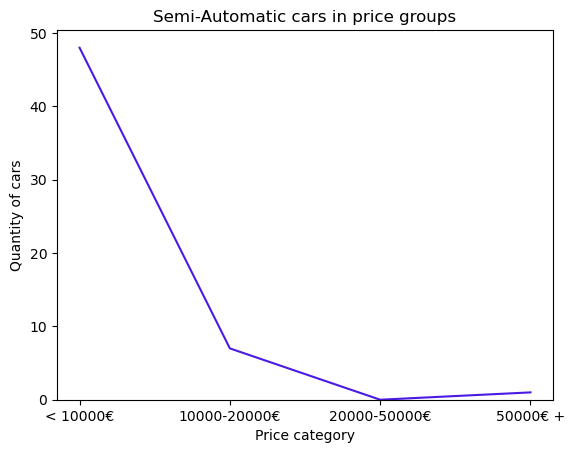

In [77]:
# Create bar charts, that show how gear type 'Semi-automatic' represented in price groups 

cars_sa = cars.loc[cars['gear'] == 'Semi-automatic']
price_bin_year12 = cars_sa.groupby(['price-bin', 'gear'], as_index = False).count()

pyplot.plot(price_bin_year12['price-bin'], price_bin_year12['make'], color = '#4a1be4')

pyplot.xlabel('Price category')
pyplot.ylabel('Quantity of cars')
pyplot.title('Semi-Automatic cars in price groups')
plt.ylim(0,)

Most of all cars, that have Semi-automatic gear are in 1st price group(under 10000€)

<b> Generating top/stats information: </b>

In [78]:
# Add columns with value_counts of model and make to dataframe

cars['model_available'] = cars['model'].map(cars['model'].value_counts())
cars['make_count'] = cars['make'].map(cars['make'].value_counts())
cars

,mileage,make,model,fuel,gear,offerType,price,hp,year,hp-bin,price-bin,fuel_group,new/used,model_available,make_count
0,235000,BMW,316,Diesel,Manual,Used,6800,116.00,2011,100-200 hp,< 10000€,Diesel,Used,49,2400
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.00,2011,100-200 hp,< 10000€,Gasoline,Used,1492,6921
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.00,2011,100-200 hp,< 10000€,Gasoline,Used,15,1924
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.00,2011,100-200 hp,< 10000€,Gasoline,Used,389,2828
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.00,2011,100-200 hp,< 10000€,Gasoline,Used,179,1232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46257,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.00,2021,5-100 hp,10000-20000€,Hybrid,New,666,1700
46258,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.00,2021,5-100 hp,10000-20000€,Hybrid,New,666,1700
46259,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.00,2021,5-100 hp,10000-20000€,Hybrid,New,666,1700
46260,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.00,2021,5-100 hp,10000-20000€,Hybrid,New,666,1700


In [79]:
# Find out top 10 of models, which are most represented

model_avg = cars[['make', 'model','price', 'model_available', 'mileage']]
model_avg = model_avg.groupby(['make', 'model'], as_index = False).mean()
model_avg = model_avg.sort_values(by = 'model_available', ascending = False) 
top10_models = model_avg.head(10)
top10_models.reset_index(drop = True, inplace = True)
top10_models

,make,model,price,model_available,mileage
0,Volkswagen,Golf,13540.55,1492.00,91738.14
1,Opel,Corsa,8959.63,1491.00,55012.01
2,Ford,Fiesta,9864.22,1289.00,52437.59
3,Opel,Astra,9574.46,1191.00,101118.97
4,Ford,Focus,12428.89,985.00,83752.35
5,Volkswagen,up!,7622.25,945.00,55040.93
6,Skoda,Fabia,10170.06,917.00,55746.15
7,Volkswagen,Polo,10053.58,893.00,68183.68
8,smart,forTwo,7878.90,725.00,55304.53
9,Fiat,500,11022.25,666.00,25588.98


And now we are going to check models, that are represented just once on AutoScaut24

In [80]:
rare_models = cars.loc[cars['model_available'] == 1]
rare_models[['make', 'model', 'price', 'hp', 'mileage']]

,make,model,price,hp,mileage
762,Mercedes-Benz,GLS 500,86885,455.00,2267
3401,Chrysler,Grand Voyager,9999,287.00,145000
3630,Volkswagen,Cross Golf,9900,160.00,87000
4567,Mercedes-Benz,SLC 200,36950,184.00,44000
5080,Dodge,Nitro,9700,260.00,107130
...,...,...,...,...,...
45603,Mercedes-Benz,S 260,134999,330.00,15
45985,Kia,e-Niro,37480,204.00,35
46102,Alpine,A110,74990,292.00,3112
46183,BMW,iX3,58000,286.00,45


In [81]:
#Find out top 10 of makes, which are more represented and average stats

make_avg = cars[['make', 'model','price', 'make_count', 'mileage']]
make_avg = make_avg.groupby(['make'], as_index = False).mean()
make_avg = make_avg.sort_values(by = 'make_count', ascending = False) 
top10_make = make_avg.head(10)
top10_make.reset_index(drop = True, inplace = True)
top10_make

,make,price,make_count,mileage
0,Volkswagen,16060.09,6921.00,80881.04
1,Opel,10428.03,4801.00,78416.94
2,Ford,13793.37,4441.00,69201.89
3,Skoda,13715.19,2877.00,70644.23
4,Renault,11287.90,2828.00,57111.05
5,Audi,30000.23,2681.00,76796.27
6,BMW,23431.07,2400.00,97489.55
7,Mercedes-Benz,28379.92,2347.00,96164.90
8,SEAT,12847.43,1924.00,66158.88
9,Hyundai,12852.69,1886.00,52792.60


In [130]:
# Find out rare make of cars

rare10_make = cars.loc[cars['make_count'] == 1]
rare10_make.reset_index(drop = True, inplace = True)
rare10_make[['make', 'model', 'price', 'hp', 'mileage', 'make_count']]

,make,model,price,hp,mileage,make_count
0,Zhidou,D2S,12500,24.00,3000,1
1,Tazzari,EV Zero Classic,6500,20.00,38000,1
2,Trucks-Lkw,Ford,8200,131.00,312000,1
3,Brilliance,BS4,1500,101.00,100524,1
4,FISKER,Karma,69900,408.00,7500,1
5,Others,Landwind,1850,97.00,1,1
6,Isuzu,D-Max,16900,163.00,56000,1
7,Caravans-Wohnm,Adria,24500,132.99,2000,1
8,Alpine,A110,74990,292.00,3112,1


In [83]:
# Top 10 most expensive cars represented on AutoScout24

cars_sorted = cars.sort_values(by = 'price', ascending = False)
top10_expensive = cars_sorted.head(10)
top10_expensive.reset_index(drop = True, inplace = True)
top10_expensive[['make', 'model', 'price', 'hp', 'mileage']]

,make,model,price,hp,mileage
0,Ferrari,F12,1199900,775.00,431
1,Mercedes-Benz,S 650,717078,630.00,90
2,Maybach,Pullman,717078,630.00,90
3,Maybach,Pullman,499800,530.00,3400
4,Mercedes-Benz,SLS,465000,591.00,350
5,Lamborghini,Aventador,449900,770.00,3600
6,Ferrari,812,439900,799.00,6500
7,Lamborghini,Aventador,439900,770.00,14090
8,Lamborghini,Aventador,399999,700.00,1200
9,Porsche,991,399911,700.00,4624


In [84]:
# Top 10 cheapest cars represented on AutoScout24

top10_cheapest = cars_sorted.tail(10)
top10_cheapest = top10_cheapest.sort_values(by = 'price', ascending = True)
top10_cheapest.reset_index(drop = True, inplace = True)
top10_cheapest[['make', 'model', 'price', 'hp', 'mileage']]

,make,model,price,hp,mileage
0,Citroen,C1,1100,68.00,204000
1,Lada,Priora,1190,98.00,100611
2,Toyota,Aygo,1250,68.00,153000
3,Peugeot,206,1299,68.00,222000
4,Opel,Corsa,1300,69.00,133000
5,Volkswagen,Touran,1396,140.00,233567
6,Brilliance,BS4,1500,101.00,100524
7,SEAT,Ibiza,1500,69.00,170000
8,smart,forTwo,1500,54.00,140000
9,Fiat,Panda,1500,69.00,157000


In [99]:
cars_sorted_hp = cars.sort_values(by = 'hp', ascending = False)
top10hp = cars_sorted_hp.head(10)
top10hp = top10hp.reset_index()
top10hp[['make', 'model', 'price', 'hp', 'mileage']]

,make,model,price,hp,mileage
0,Mercedes-Benz,G 63 AMG,216619,850.00,9234
1,Audi,R8,295000,799.00,11000
2,Ferrari,812,439900,799.00,6500
3,Ferrari,F12,1199900,775.00,431
4,Tesla,Model S,54450,772.00,71099
5,Tesla,Model X,99999,772.00,63205
6,Ford,Mustang,121000,771.00,50
7,Lamborghini,Aventador,439900,770.00,14090
8,Lamborghini,Aventador,449900,770.00,3600
9,Corvette,Z06,148600,767.00,9790


In [115]:
c = cars.loc[cars['hp'] <= 20]
c['model'].unique()

array(['Due', 'Twizy', 'JS 50', 'City', 'Ape', 'M.Go', 'EV Zero Classic',
       'M8', 'Kona', 'Birò'], dtype=object)

In [121]:
hp_avg = cars[['make', 'model','price', 'hp', 'model_available', 'mileage']]
hp_avg = hp_avg.groupby(['make', 'model'], as_index = False).mean()
hp_avg = hp_avg.sort_values(by = 'hp', ascending = True) 
bot10_hp = hp_avg.head(10)
bot10_hp.reset_index(drop = True, inplace = True)
bot10_hp

,make,model,price,hp,model_available,mileage
0,Ligier,JS 50,9570.00,5.00,5.00,30447.40
1,Estrima,Birò,13090.00,5.00,2.00,225.00
2,Microcar,M.Go,8262.86,5.86,7.00,30994.71
3,Microcar,M8,6149.50,6.00,7.00,32283.00
4,Aixam,City,12935.00,6.50,2.00,602.50
5,Microcar,Due,6745.00,7.50,2.00,37650.00
6,Piaggio,Ape,7849.75,10.25,4.00,16125.00
7,Renault,Twizy,5413.43,10.74,23.00,23813.43
8,Tazzari,EV Zero Classic,6500.00,20.00,1.00,38000.00
9,Zhidou,D2S,12500.00,24.00,1.00,3000.00


In this project, I've conducted a basic analysis of a dataset containing information about cars posted on AutoScaut 24. I've found some insights and will conclude with some presentations that contain my main findings. Thank you for your time! Check my Github portfolio for a presentation. ---> https://github.com/paulo81818/Data-Business-Analysis-Portfolio 